### Logistic Regression with ROC curve and ROC AUC score

In [5]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import seaborn as sns

In [3]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [7]:
# generate a no skill prediction (majority class)
# Dummy model with default 0 as output(prediction)
dummy_prob = [0 for _ in range(len(y_test))]
dummy_prob[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
model_prob = model.predict_proba(X_test)
# prediction based on the probability

In [10]:
model_prob = model_prob[:, 1] # one outcome (+ve)

In [11]:
model_prob[:10]

array([0.03862207, 0.66020884, 0.54401347, 0.87220886, 0.63720469,
       0.43269765, 0.94400689, 0.27130537, 0.05832848, 0.02734271])

In [12]:
# calculate scores
dummy_auc = roc_auc_score(y_test, dummy_prob)
model_auc = roc_auc_score(y_test, model_prob)
print('Dummy: ROC AUC=%.3f' % (dummy_auc))
print('Model: ROC AUC=%.3f' % (model_auc))

Dummy: ROC AUC=0.500
Model: ROC AUC=0.913


We get False Positive and True Positive Rate

Plotting TPR in Y axis and FPR in X axis

In [19]:
dummy_fpr, dummy_tpr, thresholds = roc_curve(y_test, dummy_prob) # fpr, tpr, thresholds
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob) # fpr, tpr, thresholds

In [20]:
model_fpr[:10]

array([0.        , 0.        , 0.        , 0.00649351, 0.00649351,
       0.01298701, 0.01298701, 0.01948052, 0.01948052, 0.02597403])

In [21]:
model_tpr[:10]

array([0.        , 0.00568182, 0.32386364, 0.32386364, 0.35795455,
       0.35795455, 0.42045455, 0.42045455, 0.42613636, 0.42613636])

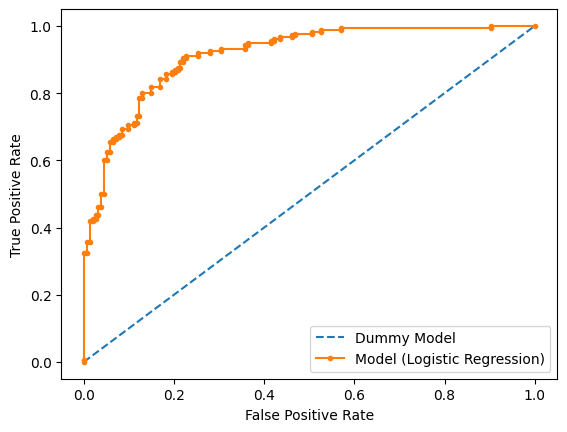

In [22]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Model (Logistic Regression)')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

Area (Logistic) > Area (Dummy)

So Logistic has done well

In [23]:
import numpy as np

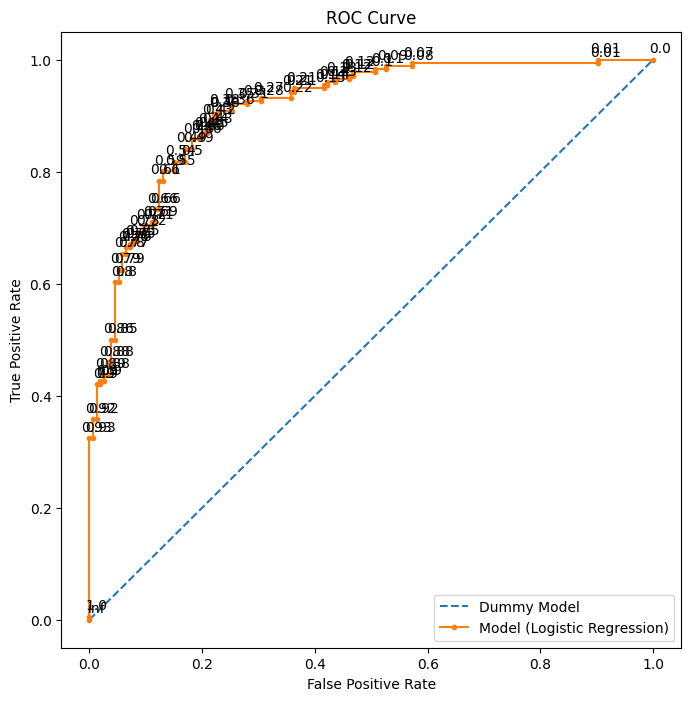

In [35]:
import numpy as np
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Model (Logistic Regression)')
# Annotating the threshold values
for fpr, tpr, threshold in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(threshold, 2)}', xy=(fpr, tpr), textcoords='offset points', xytext=(5, 5), ha='center')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.show()

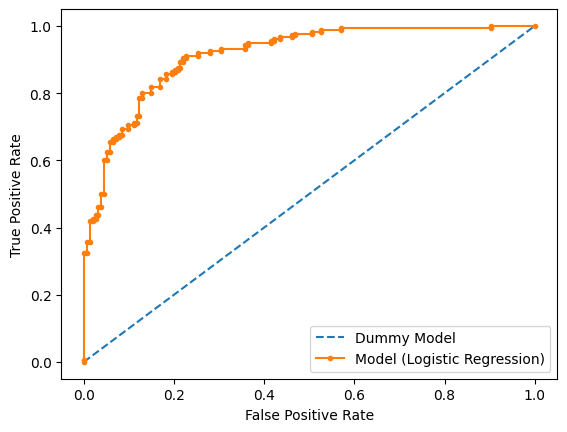

In [34]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Model (Logistic Regression)')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()